In [1]:
from datetime import datetime

# Notebook for Shift with Chenran

Shift on  28 and 29 September 2022 for testing Bayesian Optimisation (BO) against Reinforcement Learning (RL).

Once we know BO is working in the machine, the plan is to test BO and RL in pairs on the same problems (targets) and compare their performance in the real world.

In [2]:
# Define target (and thresholds) ... max steps is chosen seperately for each algorithm
comment = "test"

target_mu_x = 0.0
target_sigma_x = 0.0
target_mu_y = 0.0
target_sigma_y = 0.0

target_mu_x_threshold = 3.3198e-6
target_mu_y_threshold = 3.3198e-6
target_sigma_x_threshold = 3.3198e-6
target_sigma_y_threshold = 3.3198e-6


initializing ocelot...


  0%|          | 0/10 [00:00<?, ?it/s]/Users/jankaiser/Documents/DESY/ares-ea-rl/ea_bo.py:173: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:204.)
  X = torch.cat([X, torch.tensor([new_action])])
 90%|█████████ | 9/10 [00:57<00:06,  6.43s/it]/opt/homebrew/Caskroom/miniforge/base/envs/rl39/lib/python3.9/site-packages/botorch/optim/optimize.py:287: RuntimeWarning: Optimization failed in `gen_candidates_scipy` with the following warning(s):
[OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 1.')]
Trying again with a new set of initial conditions.
  warnings.warn(first_warn_msg, RuntimeWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/rl39/lib/python3.9/site-packages/botorch/optim/optimize.py:298: RuntimeWarni

title = 'Beam Optimisation on AREABSCR1 using Bayesian Optimisation'
msg = 'Bayesian Optimisation optimised beam on AREABSCR1\n\nAgent: Bayesian Optimisation\nStart time: 2022-09-27 22:31:18.943040\nTime taken: 0:01:10.481512\nNo. of steps: 11\n\nBeam before:\n    mu_x    = -2.9100 mm\n    sigma_x =  1.2176 mm\n    mu_y    = -0.4351 mm\n    sigma_y =  0.9555 mm\n\nBeam after:\n    mu_x    = -0.6459 mm\n    sigma_x =  0.2592 mm\n    mu_y    = -0.2550 mm\n    sigma_y =  0.9470 mm\n\nTarget beam:\n    mu_x    =  0.0000 mm    (e = 0.0033 mm) :/\n    sigma_x =  0.0000 mm    (e = 0.0033 mm) :/\n    mu_y    =  0.0000 mm    (e = 0.0033 mm) :/\n    sigma_y =  0.0000 mm    (e = 0.0033 mm) :/\n\nFinal magnet settings:\n    AREAMQZM1 strength =   6.7526 1/m^2\n    AREAMQZM2 strength = -10.5258 1/m^2\n    AREAMCVM1 kick     =  -0.1187 mrad\n    AREAMQZM3 strength =   7.4829 1/m^2\n    AREAMCHM1 kick     =  -0.9061 mrad\n    '


/usr/bin/lp: No such file or directory


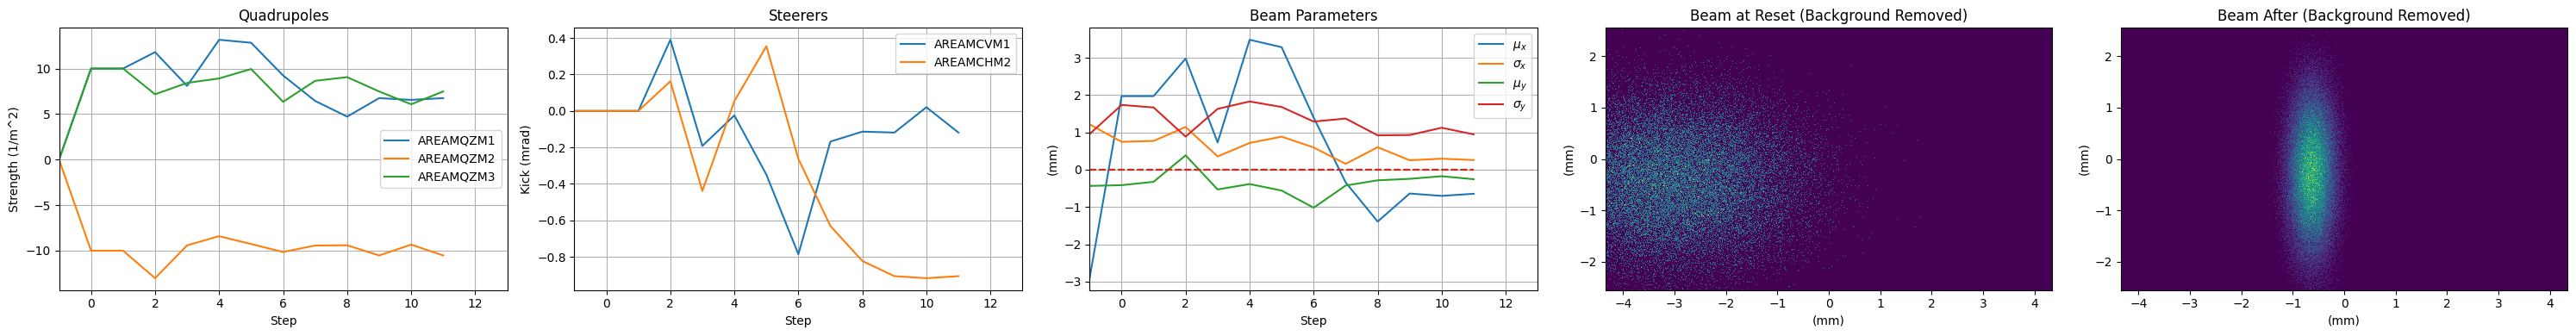

In [3]:
# Bayesian Optimisation
from ea_bo import optimize

optimize(
    target_mu_x=target_mu_x,
    target_sigma_x=target_sigma_x,
    target_mu_y=target_mu_y,
    target_sigma_y=target_sigma_y,
    target_mu_x_threshold=target_mu_x_threshold,
    target_mu_y_threshold=target_mu_y_threshold,
    target_sigma_x_threshold=target_sigma_x_threshold,
    target_sigma_y_threshold=target_sigma_y_threshold,
    max_steps=10,
    model_name="Bayesian Optimisation",
    logbook=True,
    data_log_dir=f"kit_shift_data/bo/{datetime.now():%Y%m%d%H%M}_{comment}",
    progress_bar=True,
    callback=None,
    obj_function="logmae",
    acquisition="EI",
    init_x=None,
    init_samples=5,
    filter_action=None,
)


/opt/homebrew/Caskroom/miniforge/base/envs/rl39/lib/python3.9/site-packages/stable_baselines3/common/save_util.py:166: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
  warnings.warn(
100%|██████████| 10/10 [01:02<00:00,  6.27s/it]


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: polished-donkey-996\nStart time: 2022-09-27 22:32:39.870068\nTime taken: 0:01:02.748656\nNo. of steps: 10\n\nBeam before:\n    mu_x    = -0.6459 mm\n    sigma_x =  0.2592 mm\n    mu_y    = -0.2600 mm\n    sigma_y =  0.9513 mm\n\nBeam after:\n    mu_x    =  0.7665 mm\n    sigma_x =  0.3376 mm\n    mu_y    =  0.0850 mm\n    sigma_y =  0.0722 mm\n\nTarget beam:\n    mu_x    =  0.0000 mm    (e = 0.0033 mm) :/\n    sigma_x =  0.0000 mm    (e = 0.0033 mm) :/\n    mu_y    =  0.0000 mm    (e = 0.0033 mm) :/\n    sigma_y =  0.0000 mm    (e = 0.0033 mm) :/\n\nFinal magnet settings:\n    AREAMQZM1 strength =   7.2807 1/m^2\n    AREAMQZM2 strength = -15.3909 1/m^2\n    AREAMCVM1 kick     =  -0.1422 mrad\n    AREAMQZM3 strength =  18.2787 1/m^2\n    AREAMCHM1 kick     =   0.0304 mrad\n    '


/usr/bin/lp: No such file or directory


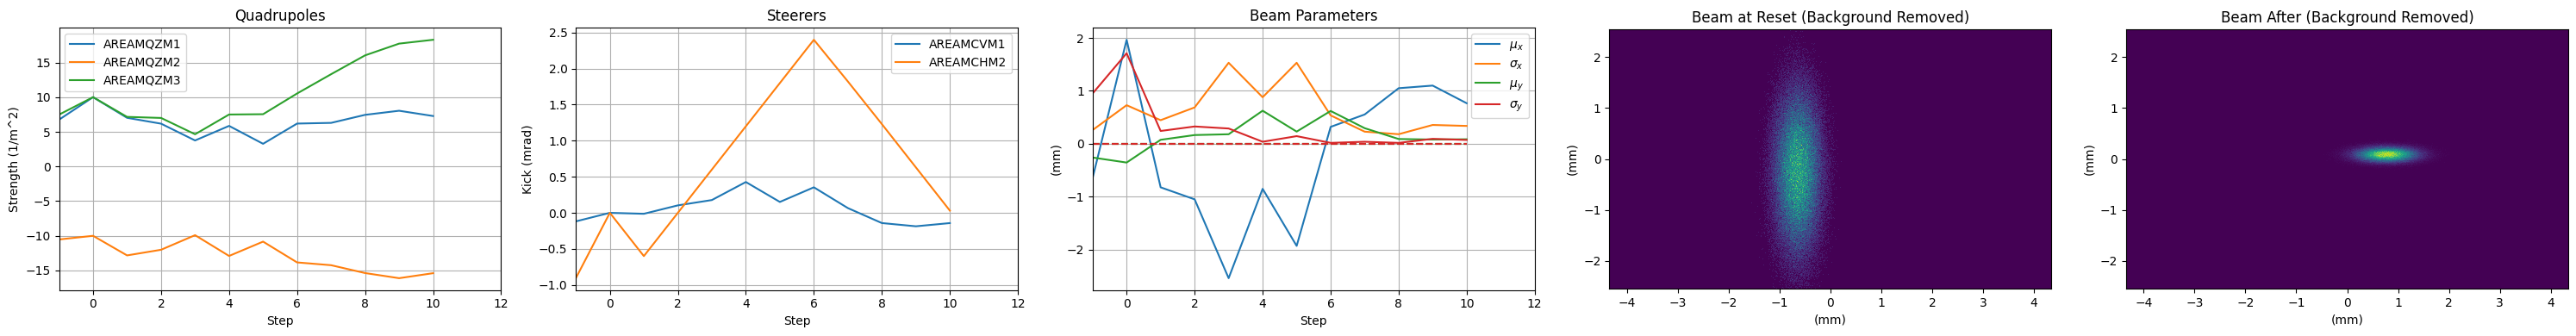

In [4]:
# Reinforcement Learning
from ea_optimize import optimize_donkey

optimize_donkey(
    target_mu_x=target_mu_x,
    target_sigma_x=target_sigma_x,
    target_mu_y=target_mu_y,
    target_sigma_y=target_sigma_y,
    target_mu_x_threshold=target_mu_x_threshold,
    target_mu_y_threshold=target_mu_y_threshold,
    target_sigma_x_threshold=target_sigma_x_threshold,
    target_sigma_y_threshold=target_sigma_y_threshold,
    max_steps=10,
    model_name="polished-donkey-996",
    logbook=True,
    data_log_dir=f"kit_shift_data/rl/{datetime.now():%Y%m%d%H%M}_{comment}",
    progress_bar=True,
    callback=None,
)
